In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

## Observation Data

In [2]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
observations.shape

(23296, 3)

In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [45]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Parks in dataset:
1. Great Smoky Mountains National Park
1. Yesemite National Park
1. Bryce National Park
1. Yellowstone National Park


## Species Data


In [6]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [9]:
species.shape

(5824, 4)

In [10]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [11]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

Conservation status:
1. Endangered
1. Threatened
1. Species of Concern
1. In Recovery

In [46]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

# Analysis


In [39]:
sns.set_style("whitegrid")

## What is the distribution of conservation_status for animals?

In [40]:
conservationCategory = species.groupby(['conservation_status', 'category']).size().reset_index().pivot(columns='category', index='conservation_status', values=0)
conservationCategory.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Distribution of Conservation Status on Animal')

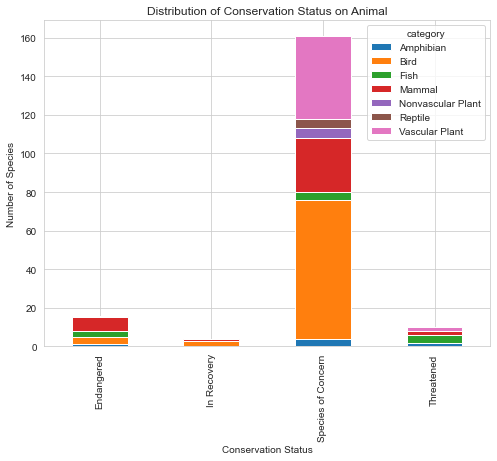

In [41]:
ax = conservationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Distribution of Conservation Status on Animal')

## Are certain types of species more likely to be endangered?

In [42]:
endangered = species[species.conservation_status == 'Endangered']
endangered.head()

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered


Text(0.5, 1.0, 'Counts')

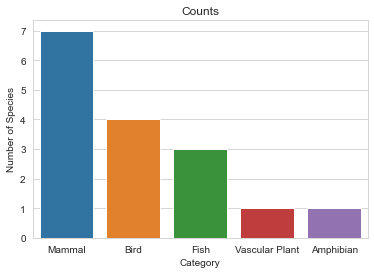

In [44]:
ax = sns.countplot(data=endangered, x='category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Species')
ax.set_title('Counts')

## Are the differences between species and their conservation status significant?

In [57]:
species_sub = species.groupby(['conservation_status', 'category']).size().reset_index()
species_sub.rename(columns={0: 'count'}, inplace=True)
species_sub

,conservation_status,category,count
0,Endangered,Amphibian,1
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Mammal,7
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,In Recovery,Mammal,1
7,Species of Concern,Amphibian,4
8,Species of Concern,Bird,72
9,Species of Concern,Fish,4


### Mammal

In [71]:
mammal = species_sub[species_sub.category == 'Mammal']
mammal

,conservation_status,category,count
3,Endangered,Mammal,7
6,In Recovery,Mammal,1
10,Species of Concern,Mammal,28
16,Threatened,Mammal,2


Text(0.5, 1.0, 'Mammal')

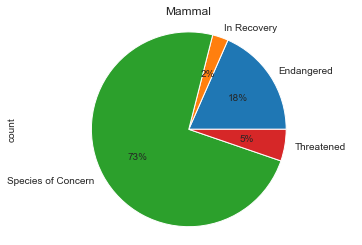

In [85]:
ax = mammal.plot.pie(y='count', labels=mammal.conservation_status, autopct='%1d%%')
plt.axis('equal')
ax.get_legend().remove()
ax.set_title('Mammal')

### Bird

In [61]:
bird = species_sub[species_sub.category == 'Bird']
bird

,conservation_status,category,count
1,Endangered,Bird,4
5,In Recovery,Bird,3
8,Species of Concern,Bird,72


Text(0.5, 1.0, 'Bird')

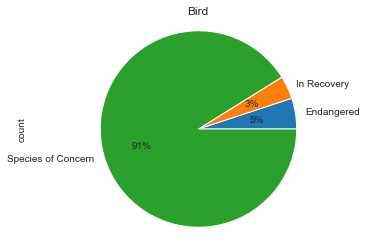

In [88]:
ax = bird.plot.pie(y='count', labels=bird.conservation_status, autopct='%1d%%')
plt.axis('equal')
ax.get_legend().remove()
ax.set_title('Bird')

### Fish

In [89]:
fish = species_sub[species_sub.category == 'Fish']
fish

,conservation_status,category,count
2,Endangered,Fish,3
9,Species of Concern,Fish,4
15,Threatened,Fish,4


Text(0.5, 1.0, 'Fish')

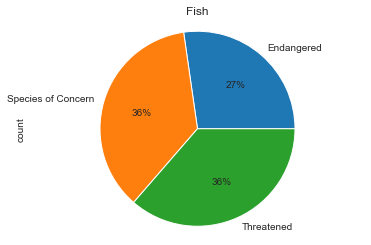

In [90]:
ax = fish.plot.pie(y='count', labels=fish.conservation_status, autopct='%1d%%')
plt.axis('equal')
ax.get_legend().remove()
ax.set_title('Fish')